In [1]:
import import_ipynb
import Helper as lib
import operator
import numpy as np

importing Jupyter notebook from Helper.ipynb


In [2]:
# First get the description data
desc_data = lib.GetDescriptionData()

In [3]:
# Then collect tag data
tag_data = lib.GetTagData()

In [43]:
train_feature_data = lib.GetFeaturesFileData('data/features_train/features_resnet1000_train.csv')
test_feature_data = lib.GetFeaturesFileData('data/features_test/features_resnet1000_test.csv')

In [54]:
# Remove the extra image file name on the front
stripped_feature_data = []

for i in range(len(desc_data[0])):
    new_vector = train_feature_data[i][1:1001]
    new_vector = [float(i) for i in new_vector]
    stripped_feature_data.append(new_vector)
stripped_feature_data = np.array(stripped_feature_data)

# Do the same for test features
# First sort by the first index so its numbered in order
test_feature_data.sort(key=lambda x: x[0])
stripped_feature_test_data = []
for i in range(len(desc_data[1])):
    new_vector = test_feature_data[i][1:1001]
    new_vector = [float(i) for i in new_vector]
    stripped_feature_test_data.append(new_vector)
stripped_feature_test_data = np.array(stripped_feature_test_data)

In [34]:
# Create the bag of words representation of the whole data we want

# Get a combination of descriptions and tags from training set
COMBINED_TRAIN_DATA = lib.CombineDescAndTags(desc_data[0], tag_data[0])
COMBINED_TEST_DATA = lib.CombineDescAndTags(desc_data[1], tag_data[1])

# Sanity check
STANDARD_BAG_VECTOR = lib.GetBagOfWordsVector(desc_data[0])
print(len(STANDARD_BAG_VECTOR))

# First create a list of word called bag of words vector from training data
DESC_BAG_VECTOR = lib.GetBagOfWordsVector(COMBINED_TRAIN_DATA)
print(len(DESC_BAG_VECTOR))

# Second, convert our represnetation of the test_data with this vector
TAGS_AS_DESC = lib.ConvertTagToDescFormat(tag_data[1])
TRAIN_DESC_BAG_VECTORS = lib.ConvertDescToBagVector(COMBINED_TRAIN_DATA, DESC_BAG_VECTOR)
TEST_DESC_BAG_VECTORS = lib.ConvertDescToBagVector(COMBINED_TEST_DATA, DESC_BAG_VECTOR)
print('complete')

# OVER FITTING. Can't use description as a search...

7660
7678
complete


In [55]:
# reference: https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy
def get_euclidean_distance(a, b):
    a = np.array(a, dtype=float)
    b = np.array(b, dtype=float)
    return np.linalg.norm(a - b)

In [98]:
# Uses the already calculated bag of words representation of the data to guess which images are closest
def ScoreBag(feature_data = [], search_list =str, dictionary = [], training_image_data = [], training_feature_data = [], pools = int):

        # First preprocess our search into words that would compare to our bag of words vector
        search_string = ''
        for word in search_list:
            search_string += word + ' '
        search = lib.PreProcess(search_string)
        
        # Create a list of lists, where the first index is the image index, and the second list is a list of scores.
        # The indexes in the second list refer to which index word was searched to produce it from the search terms.
        score_list = []
        
        # Generate the unique words in our search list
        unique_words = []  
        for word in search:     
            if word in dictionary:
                unique_words.append(word)    
            # Removes duplicates
            unique_words = list(set(unique_words))
        
        # Change image data, and dictionary,  to list
        training_image_data = training_image_data.tolist()
        dictionary = dictionary.tolist()
        
        # For each search term, if it exists in the bag of words vector dictionary, 
        # score how related each image is to that word
        for i in range(len(training_image_data)):     
            # Sum up the count for all unique words
            count = 0
            for word in unique_words:
                if word in dictionary:
                    count += training_image_data[i][dictionary.index(word)]
            # Append new entry
            score_list.append([i, count])
        
        # After calculating the scores, pick the highest twenty and return them
        # First sort the whole list by the scores
        score_list.sort(key=lambda x: x[1])
        
        # Reverse the list
        score_list = list(reversed(score_list))
        
        # This index is the image we found to be the closest within training data
        image_indexes = score_list[:pools]
        size = int(20/pools)
        
        # Now compare all test image features to this image
        chosen_index = []
        for image_index in image_indexes:
            train_feature = training_feature_data[image_index]
            differences = []
            for i in range(len(feature_data)):
                diff = get_euclidean_distance(train_feature, feature_data[i])
                differences.append([i, diff])        
            differences.sort(key = lambda x:x[1])
            for i in range(size):
                counter = i
                length = len(chosen_index)                
                # Only add that image if it isn't already in the list
                while(length == len(chosen_index)):
                    if differences[counter][0] not in chosen_index:
                        chosen_index.append(differences[counter][0])
                    else:
                        counter += 1
            # If this is the last one we are checking
            if image_indexes.index(image_index) == len(image_indexes):
                counter = i
                while(len(chosen_index) < 20):
                     # Only add that image if it isn't already in the list
                    add_counter
                    while(length == len(chosen_index)):
                        if differences[add_counter][0] not in chosen_index:
                            chosen_index.append(differences[add_counter][0])
                        else:
                            add_counter += 1
                    counter += 1
                    
        # Remove the scores and only keep the indexes
        print(chosen_index)
        return chosen_index
    

In [99]:
print(len(TEST_DESC_BAG_VECTORS))

2000


['sky' 'full' 'flock' 'bird' 'cloudy' 'day' 'hundreds' 'bird' 'soar'
 'cloudy' 'sky' 'flock' 'bird' 'fly' 'cloud' 'bird' 'fly' 'gray'
 'overcast' 'sky' 'flock' 'bird' 'circle' 'cast' 'sky']
[0 0 0 ... 0 0 0]
[1638, 1129, 174, 1856, 802, 559, 617, 1419, 1266, 331, 514, 1639, 1245, 690, 1126, 1664, 1991, 1953, 588, 539]
Guessed image:
Image 1638



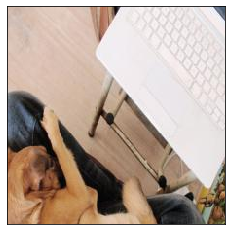

Image 1129



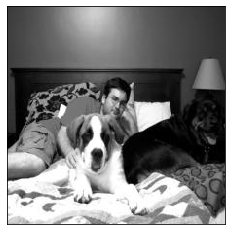

Image 174



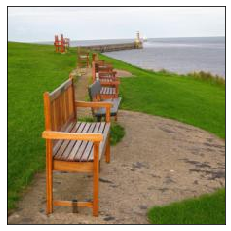

Image 1856



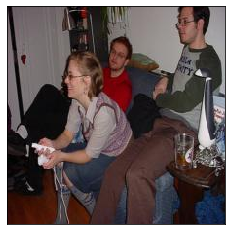

Image 802



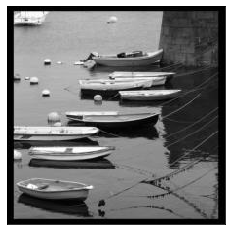

Image 559



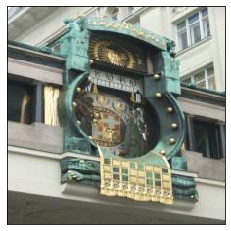

Image 617



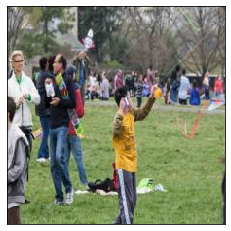

Image 1419



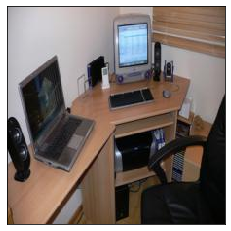

Image 1266



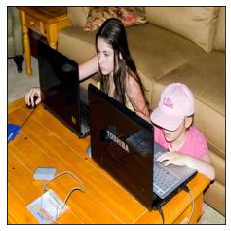

Image 331



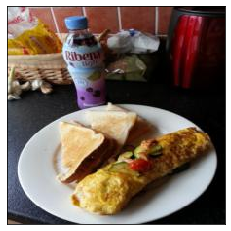

Image 514



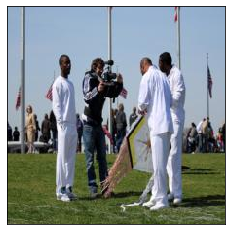

Image 1639



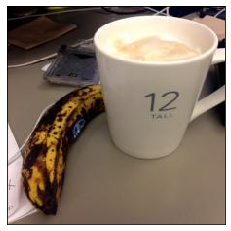

Image 1245



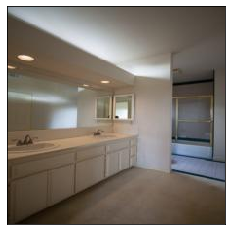

Image 690



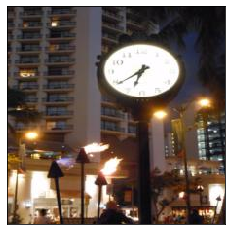

Image 1126



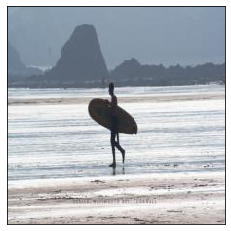

Image 1664



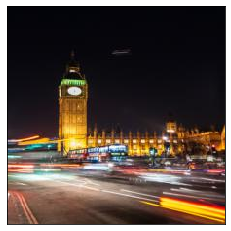

Image 1991



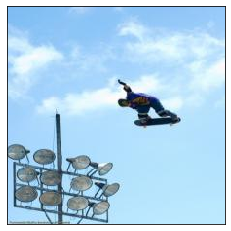

Image 1953



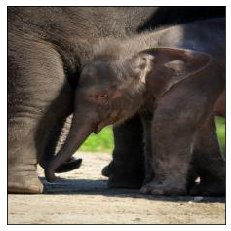

Image 588



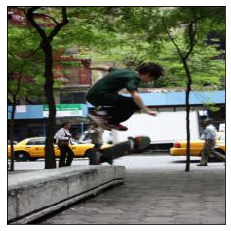

Image 539



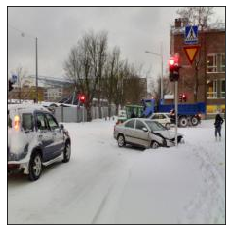

In [103]:
search_index = 1000
search = desc_data[1][search_index]
print(search)
print(TEST_DESC_BAG_VECTORS[search_index])
guesses = ScoreBag(stripped_feature_test_data, search, DESC_BAG_VECTOR, TRAIN_DESC_BAG_VECTORS, stripped_feature_data, 2)
print('Guessed image:')
lib.DisplayImages(guesses, 'test')

In [ ]:
# Try running ScoreBag and see accuracy with below
def RunScoreBag(test_desc = [], image_data = [], dictionary = []):
    score = 0
    batch = 0
    counter = 0
    guess_list = []
    for description in test_desc:
        guesses = ScoreBag(image_data, description, dictionary)
        guess_list.append(guesses)
        if counter in guesses:
            score += 1
            
        if counter > batch * 100:
            print('Progress:' + str(counter) + '/' + str(len(test_desc)))
            batch +=1
        
        counter += 1
    
    percentage = score / len(test_desc)
    print('Overall score was: ' + str(percentage))
    return guess_list

In [26]:
guess_submission = RunScoreBag(desc_data[1][:100], TEST_DESC_BAG_VECTORS, DESC_BAG_VECTOR)

['front', 'woman', 'doorway', 'planters', 'cell', 'black', 'along', 'street', 'blue', 'side', 'watch', 'check', 'phone', 'entrance', 'talk', 'wear', 'past', 'build', 'sidewalk', 'walk']
['large', 'small', 'plate', 'cake', 'slice', 'quarter', 'food', 'piece', 'slab', 'flowery', 'angel', 'contain', 'top', 'sit', 'yellow', 'upon']
Progress:1/100
['shin', 'sign', 'street', 'window', 'picture', 'overhead', 'light', 'intersection', 'fly', 'airplane', 'traffic', 'sun', 'group', 'stoplight', 'sit', 'several', 'surround']
['pair', 'middle', 'two', 'uniform', 'officer', 'people', 'side', 'ride', 'neon', 'police', 'horse', 'sandy', 'rid', 'beach', 'lot', 'vest', 'mean']
['booths', 'people', 'adults', 'couple', 'woman', 'use', 'telephone', 'machine', 'soda', 'phone', 'next', 'man', 'talk', 'public', 'outdoors', 'stand', 'pay', 'together', 'adjacent']
['park', 'blue', 'cloud', 'trick', 'ramp', 'perform', 'wooden', 'person', 'jump', 'air', 'sky', 'man', 'skateboard', 'background', 'skateboarder']
['

['hold', 'decorations', 'smile', 'beach', 'group', 'small', 'banner', 'look', 'colorful', 'long', 'near', 'outside', 'man', 'kite', 'large', 'men', 'stretch', 'build', 'stand']
['catch', 'play', 'leg', 'field', 'leap', 'gentleman', 'front', 'dog', 'another', 'get', 'jump', 'bend', 'frisbee', 'man', 'background']
['tobacco', 'sign', 'people', 'front', 'propeller', 'war', 'area', 'runway', 'world', 'amongst', 'warn', 'plan', 'museum', 'smoke', 'airplane', 'outdoor', 'sit', 'allow', 'walk', 'yellow', 'airport']
['toilet', 'home', 'rack', 'slide', 'divider', 'bathtub', 'glass', 'interior', 'white', 'dark', 'bathroom', 'tub', 'towel', 'tile', 'black']
['hold', 'leg', 'lie', 'handle', 'stomach', 'fully', 'lay', 'bed', 'clothe', 'half', 'top', 'purse', 'one', 'beautiful', 'girl', 'woman', 'handbag']
['hold', 'large', 'fork', 'assort', 'look', 'wear', 'pizza', 'smile', 'slice', 'glass', 'lady', 'toppings', 'delicious', 'woman']
['brown', 'large', 'park', 'ship', 'background', 'blue', 'walkway'

In [28]:
print(guess_submission)

[[0, 1694, 844, 1808, 971, 798, 586, 1101, 996, 1963, 1467, 1458, 1142, 1138, 751, 173, 90, 1438, 259, 36, 1925], [1, 1071, 616, 601, 1939, 1824, 1959, 1835, 1790, 1456, 1121, 916, 833, 524, 504, 487, 293, 233, 177, 1932, 1758], [2, 216, 1830, 1664, 1050, 1026, 1844, 1606, 294, 1945, 1793, 1524, 1391, 1207, 1085, 1084, 762, 302, 263, 1668, 1303], [3, 434, 1383, 1070, 1918, 1244, 1191, 399, 374, 159, 13, 1834, 1708, 1619, 1239, 972, 938, 886, 753, 1845, 1578], [4, 1808, 1694, 1690, 1101, 1256, 972, 844, 497, 1432, 1421, 248, 1915, 1843, 1651, 1407, 1290, 870, 7, 1985, 1505], [5, 1162, 599, 552, 1802, 1087, 905, 754, 597, 95, 1744, 1099, 1034, 630, 456, 1662, 1382, 969, 860, 452, 227], [1312, 6, 674, 673, 725, 452, 696, 1731, 1637, 1581, 126, 1992, 1219, 978, 738, 416, 258, 1822, 1419, 1061, 1048], [7, 484, 1938, 1407, 840, 1915, 902, 43, 1978, 1891, 1860, 1690, 1645, 1131, 1078, 214, 104, 1928, 1689, 1022, 984], [8, 788, 1366, 1058, 730, 281, 257, 1484, 1003, 583, 86, 1240, 1226, 1217, 

In [ ]:
for word in lib.ConvertDescToBagVector(lib.ConvertTagToDescFormat(tag_data[1]), DESC_BAG_VECTOR):